In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

x.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

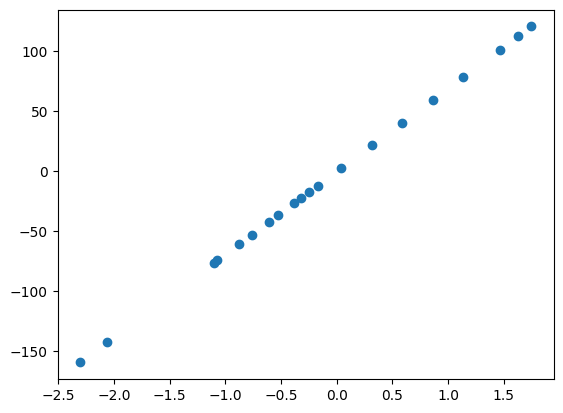

In [ ]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, x):  #метод, который принимает значение входной переменной и возвращает теоретическое значение выходной - метод предсказания результата по факторам
        return self.b0 + self.b1 * x
    def error(self, X, Y):    #MSE
        return sum((self.predict(X) - Y)**2) / (2 * len(X))
    def fit(self, X, Y):  #метод градиентного спуска
        alpha = 0.1
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1

In [ ]:
hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))

J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 2937.6446095153406


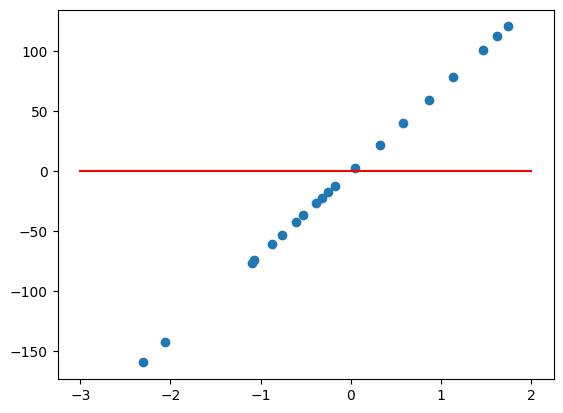

In [ ]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)

plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [ ]:
hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2253.7456808918546


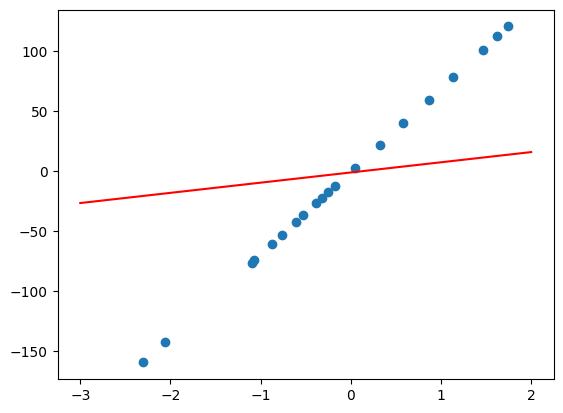

In [ ]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [ ]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 0.03937321303112907


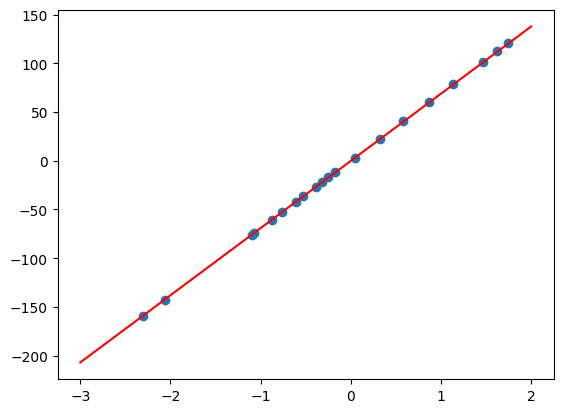

In [ ]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

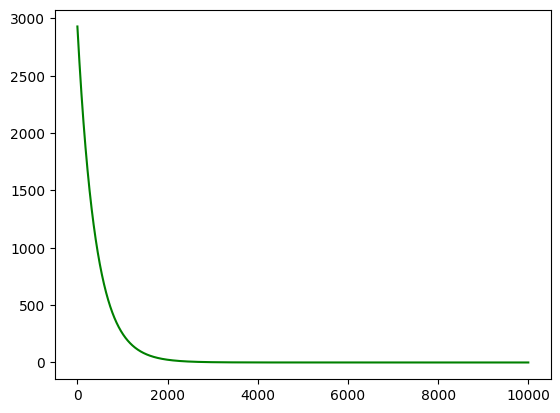

In [ ]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

Задания для самостоятельного выполнения
1. Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.
2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.
3. Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.
4. Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.
5. Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.
6. Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.
7. Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

1. Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.

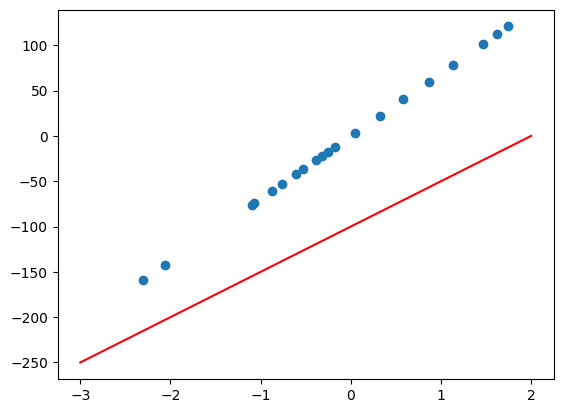

In [ ]:
hyp = Model()
hyp.b0 = -100
hyp.b1 = 50

X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)

plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [ ]:
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 8.222798585527682e-25


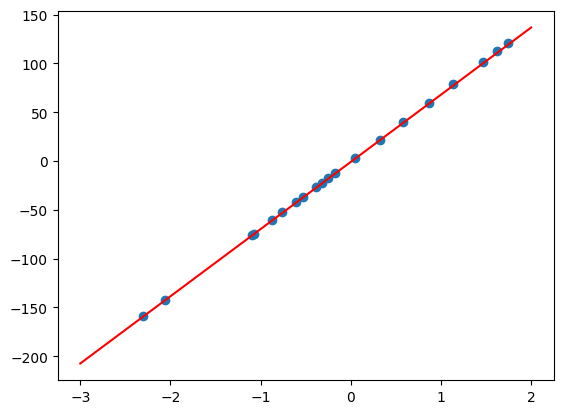

In [ ]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

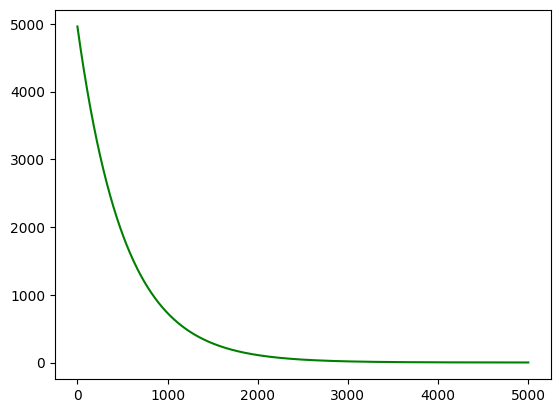

In [ ]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

error after gradient descent: 2292.2378850040686


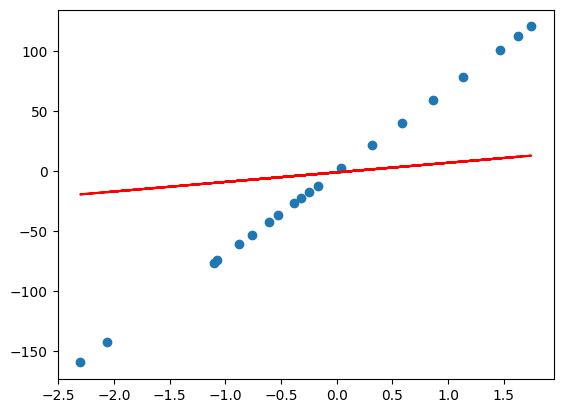

In [ ]:
"""
Тут работает олег

короче напиши тут что скорость роста градиента крайне мала и из-за этого регрессия не сходится понять это можно по уравнению регрессии.



"""


hyp = Model()




steps, errors = hyp.fit(np.array(x), np.array(y),alpha = 0.000001,max_steps=100000)
J = hyp.error(x, y)
print("error after gradient descent:", J)

plt.figure()
plt.scatter(x, y)
plt.plot(x, hyp.predict(x), 'r')
plt.show()

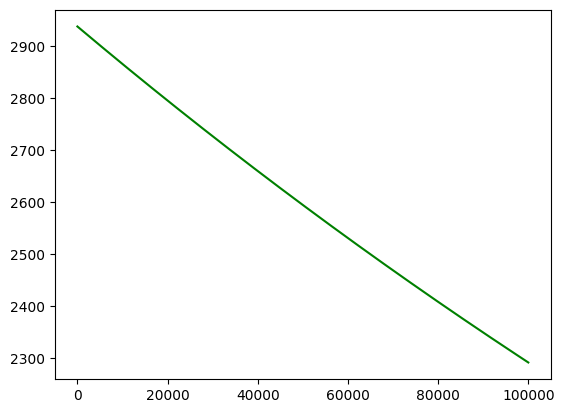

In [ ]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

In [ ]:
steps, errors = hyp.fit(x, y, alpha = 0.001)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2.5894359213879715e-29


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/y.csv', index_col=0)['0']


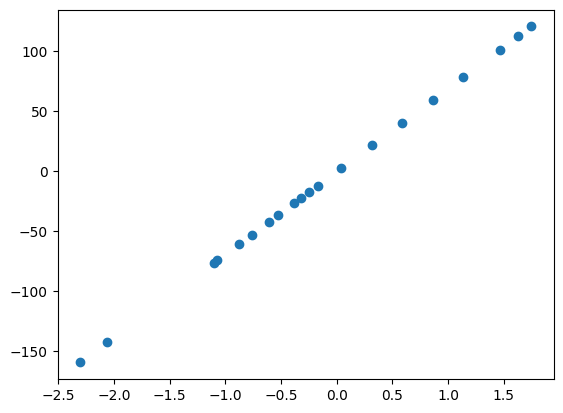

In [ ]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [ ]:
class Model_O():
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, loss, _len):
        return np.sum(np.power(loss,2))/ (2 * _len)

    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        _X=np.array(X)
        _Y=np.array(Y)
        t=time()
        steps, errors = [], []
        step = 0
        _len=len(_Y)
        for _ in range(max_steps):
            loss=(self.predict(_X) - _Y)
            dJ0 = np.mean(loss)
            dJ1 = np.mean(loss*X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(loss,_len)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors,time()-t

"""
Ошибки Коротеева:
1) new_err = hyp.error(X, Y) -должно быть self.error(X,Y)
2) переменная max_steps которая нигде не используется
3) двойной вызов predict(X)
4) многократный вызов len(x)
5)в функции до суммирования каждый элемент делится на len(x)

"""

'\nОшибки Коротеева:\n1) new_err = hyp.error(X, Y) -должно быть self.error(X,Y)\n2) переменная max_steps которая нигде не используется\n3) двойной вызов predict(X)\n4) многократный вызов len(x)\n5)в функции до суммирования каждый элемент делится на len(x)\n\n'

In [ ]:
class Model_K(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        t=time()
        steps, errors = [], []
        step = 0
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors,time()-t

In [ ]:
model = Model_O()
steps, errors,t = model.fit(x, y,max_steps=10000)
J = model.error(model.predict(x)-y, len(y))
print("error after gradient descent:", J)
print(t)

error after gradient descent: 2.7769753060572152e-06
3.5118253231048584


In [ ]:
hyp = Model_K()
steps, errors,t = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)
print(t)

error after gradient descent: 2.776975306057215e-06
12.008748531341553


# Множественная линейная регрессия

In [ ]:
x = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_x.csv",
                header=None)
y = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_y.csv",
                header=None)
x

,0,1,2,3,4
0,0.071841,0.855352,-0.305597,0.028253,1.826895
1,0.139521,-0.423507,0.461059,-0.447400,-0.034988
2,1.626311,-0.257622,-0.697520,1.413219,1.086292
3,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
4,-0.783365,-0.861232,0.951448,-0.117306,0.680597
...,...,...,...,...,...
382,0.684004,2.320728,0.380965,-1.050408,-0.151801
383,-0.430455,2.097191,0.379874,0.135858,-1.400176
384,-0.457141,0.940791,-0.660270,2.325658,-1.510055
385,-0.344278,-1.209805,-2.119721,-1.485907,-0.167689


In [ ]:
from sklearn.metrics import r2_score

class Model_O():
    """Модель линейной многомерной регрессии"""

    def __init__(self, num_features):
        self.b =self.initialize_weights(num_features)  # Инициализация массива коэффициентов


    def initialize_weights(self,input_shape):

        limit = np.sqrt(6 / (input_shape + 1))

        weights = np.random.uniform(-limit, limit, size=(input_shape, 1))  # Генерация случайных весов

        return weights

    def predict(self, X):
        return np.dot(X, self.b)

    def error(self, loss, _len):
        return np.sum(np.power(loss, 2)) / (2 * _len)

    def mean_absolute_error(self, y_true, y_pred):
            return np.mean(np.abs(y_true - y_pred))

    def mean_squared_error(self, y_true, y_pred):
        return np.mean(np.square(y_true - y_pred))

    def r_value(self, y_true, y_pred):

        return self.r_squared_value(y_true, y_pred)**(1/2)

    def r_squared_value(self, y_true, y_pred):
        return r2_score(y_true,y_pred)

    def root_mean_squared_error(self, y_true, y_pred):
        return np.sqrt(self.mean_squared_error(y_true, y_pred))

    def mean_absolute_percentage_error(self, y_true, y_pred):
        return np.mean(np.abs((y_true - y_pred) / y_true))

    def score(self, X, y):
        y_pred = self.predict(X)
        mae = self.mean_absolute_error(y, y_pred)
        mse = self.mean_squared_error(y, y_pred)
        rmse = self.root_mean_squared_error(y, y_pred)
        r = self.r_value(y, y_pred)
        r2 = self.r_squared_value(y, y_pred)
        mape = self.mean_absolute_percentage_error(y, y_pred)

        metrics = {
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'R': r,
            'R²': r2,
            'MAPE': mape
        }

        return metrics

    def fit(self, X, Y, learning_rate=0.001, max_steps=5000):
        _X = np.array(X)
        _Y = np.array(Y)
        t = time()
        steps = []
        errors = []
        step = 0
        _len = len(_Y)

        for _ in range(max_steps):
            loss = self.predict(_X) - _Y
            dJ = np.dot(_X.T, loss) / _len  # Градиентный спуск
            self.b -= learning_rate * dJ
            new_err = self.error(loss, _len)
            step += 1
            steps.append(step)
            errors.append(new_err)
        t=time()-t

        return steps, errors, t,self.score(_X,_Y)

In [ ]:
model = Model_O(5)
original_steps, original_errors,original_t ,original_score= model.fit(x, y,max_steps=10000)
J = model.error(model.predict(x)-y, len(y))
print(original_score)
print(original_t)

{'MAE': 7.7811721155624545, 'MSE': 93.80472670013091, 'RMSE': 9.685284027850237, 'R': 0.9960892542328005, 'R²': 0.9921938023980567, 'MAPE': 0.3401883307475064}
0.6833503246307373


In [ ]:
from math import factorial

def polynomialize(arr, degree):
    array=arr
    for i in range(degree-1):
        _arr=np.power(arr,i+2)/factorial(i+2)
        array=np.concatenate((array,_arr),axis=1)

    return array

In [ ]:
pol=2
a=polynomialize(x,pol)

model = Model_O(a.shape[1])
steps_2, errors2,t_2 ,score_2= model.fit(a, y,max_steps=10000)
J = model.error(model.predict(a)-y, len(y))
print(score_2)
print(t_2)

{'MAE': 7.740432708634429, 'MSE': 92.72935148983059, 'RMSE': 9.629608065224181, 'R': 0.996134173927506, 'R²': 0.9922832924662349, 'MAPE': 0.3243452542245289}
0.3939507007598877


In [ ]:
pol=3
a=polynomialize(x,pol)

model = Model_O(a.shape[1])
steps_3, errors_3,t_3 ,score_3= model.fit(a, y,max_steps=10000)
J = model.error(model.predict(a)-y, len(y))
print(score_3)
print(t_3)

{'MAE': 8.782274453812837, 'MSE': 120.23780535652179, 'RMSE': 10.965300057751351, 'R': 0.9949844757069627, 'R²': 0.9899941068978595, 'MAPE': 0.31194414492457123}
0.9665193557739258


In [ ]:
pol=10
a=polynomialize(x,pol)

model = Model_O(a.shape[1])
steps_4, errors_4,t_4 ,score_4= model.fit(a, y,max_steps=10000)
J = model.error(model.predict(a)-y, len(y))
print(score_4)
print(t)

{'MAE': 8.631381745591124, 'MSE': 114.23854875430848, 'RMSE': 10.688243483113045, 'R': 0.9952353240367461, 'R²': 0.990493350210527, 'MAPE': 0.3172094791202263}
12.008748531341553


In [ ]:
metric_df=pd.DataFrame({"Type":[],"MAE":[],"MSE":[],"RMSE":[],"R":[],"R²":[],"MAPE":[],"Time":[]})


In [ ]:
metric_df=pd.DataFrame({"Type":[],"MAE":[],"MSE":[],"RMSE":[],"R":[],"R²":[],"MAPE":[],"Time":[]})
test_df=pd.DataFrame({"Type":["Original"],"MAE":[original_score["MAE"]],"MSE":[original_score["MSE"]],"RMSE":[original_score["RMSE"]],"R":[original_score["R"]],"R²":[original_score["R²"]],"Time":[original_t],"MAPE":[original_score["MAPE"]]})
test_df1=pd.DataFrame({"Type":["2p"],"MAE":[score_2["MAE"]],"MSE":[score_2["MSE"]],"RMSE":[score_2["RMSE"]],"R":[score_2["R"]],"R²":[score_2["R²"]],"Time":[t_2],"MAPE":[score_2["MAPE"]]})
test_df5=pd.DataFrame({"Type":["3p"],"MAE":[score_3["MAE"]],"MSE":[score_3["MSE"]],"RMSE":[score_3["RMSE"]],"R":[score_3["R"]],"R²":[score_3["R²"]],"Time":[t_3],"MAPE":[score_3["MAPE"]]})
test_df10=pd.DataFrame({"Type":["10p"],"MAE":[score_4["MAE"]],"MSE":[score_4["MSE"]],"RMSE":[score_4["RMSE"]],"R":[score_4["R"]],"R²":[score_4["R²"]],"Time":[t_4],"MAPE":[score_4["MAPE"]]})

metric_df=pd.concat([metric_df, test_df,test_df1,test_df5,test_df10], ignore_index=True)

In [ ]:
metric_df

,Type,MAE,MSE,RMSE,R,R²,MAPE,Time
0,Original,7.781172,93.804727,9.685284,0.996089,0.992194,0.340188,0.683350
1,2p,7.740433,92.729351,9.629608,0.996134,0.992283,0.324345,0.393951
2,3p,8.782274,120.237805,10.965300,0.994984,0.989994,0.311944,0.966519
3,10p,8.631382,114.238549,10.688243,0.995235,0.990493,0.317209,0.732249


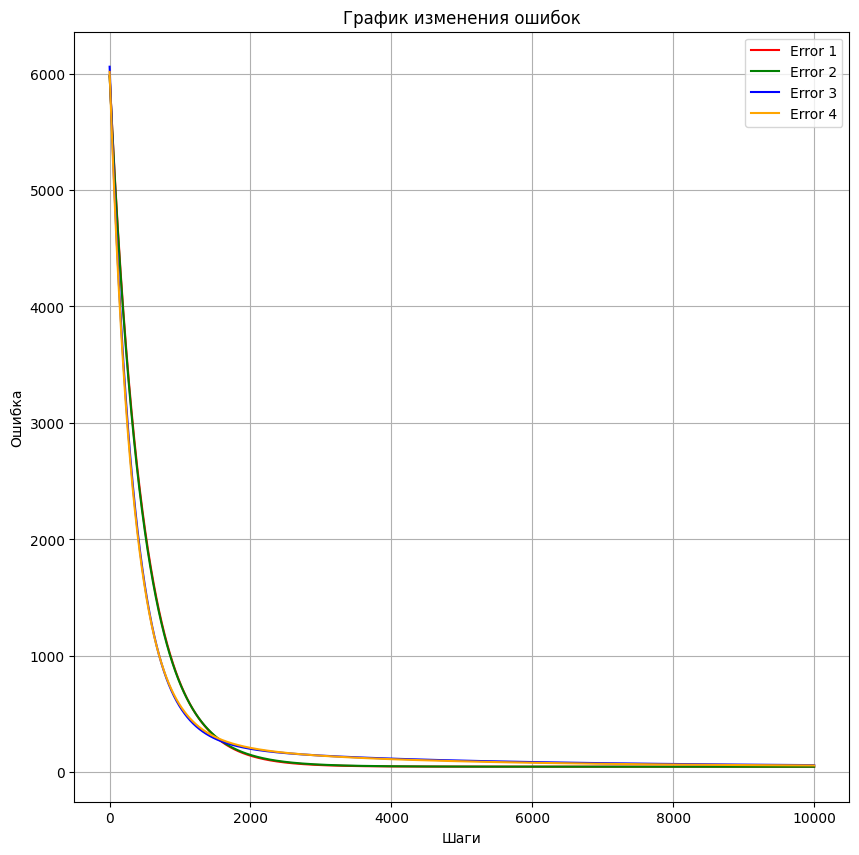

In [ ]:
import matplotlib.pyplot as plt

# Создание фигуры и осей
fig, ax = plt.subplots(figsize=(10, 10))

# Добавление сетки
ax.grid(True)

# Настройка цветов линий
colors = ['red', 'green', 'blue', 'orange']

# Построение графика для каждой ошибки
for i, error in enumerate([original_errors, errors2, errors_3, errors_4]):
    ax.plot(steps, error, color=colors[i], label=f'Error {i+1}')

# Добавление легенды
ax.legend()

# Установка заголовка
plt.title('График изменения ошибок')

# Подписи осей
plt.xlabel('Шаги')
plt.ylabel('Ошибка')

# Отображение графика
plt.show()

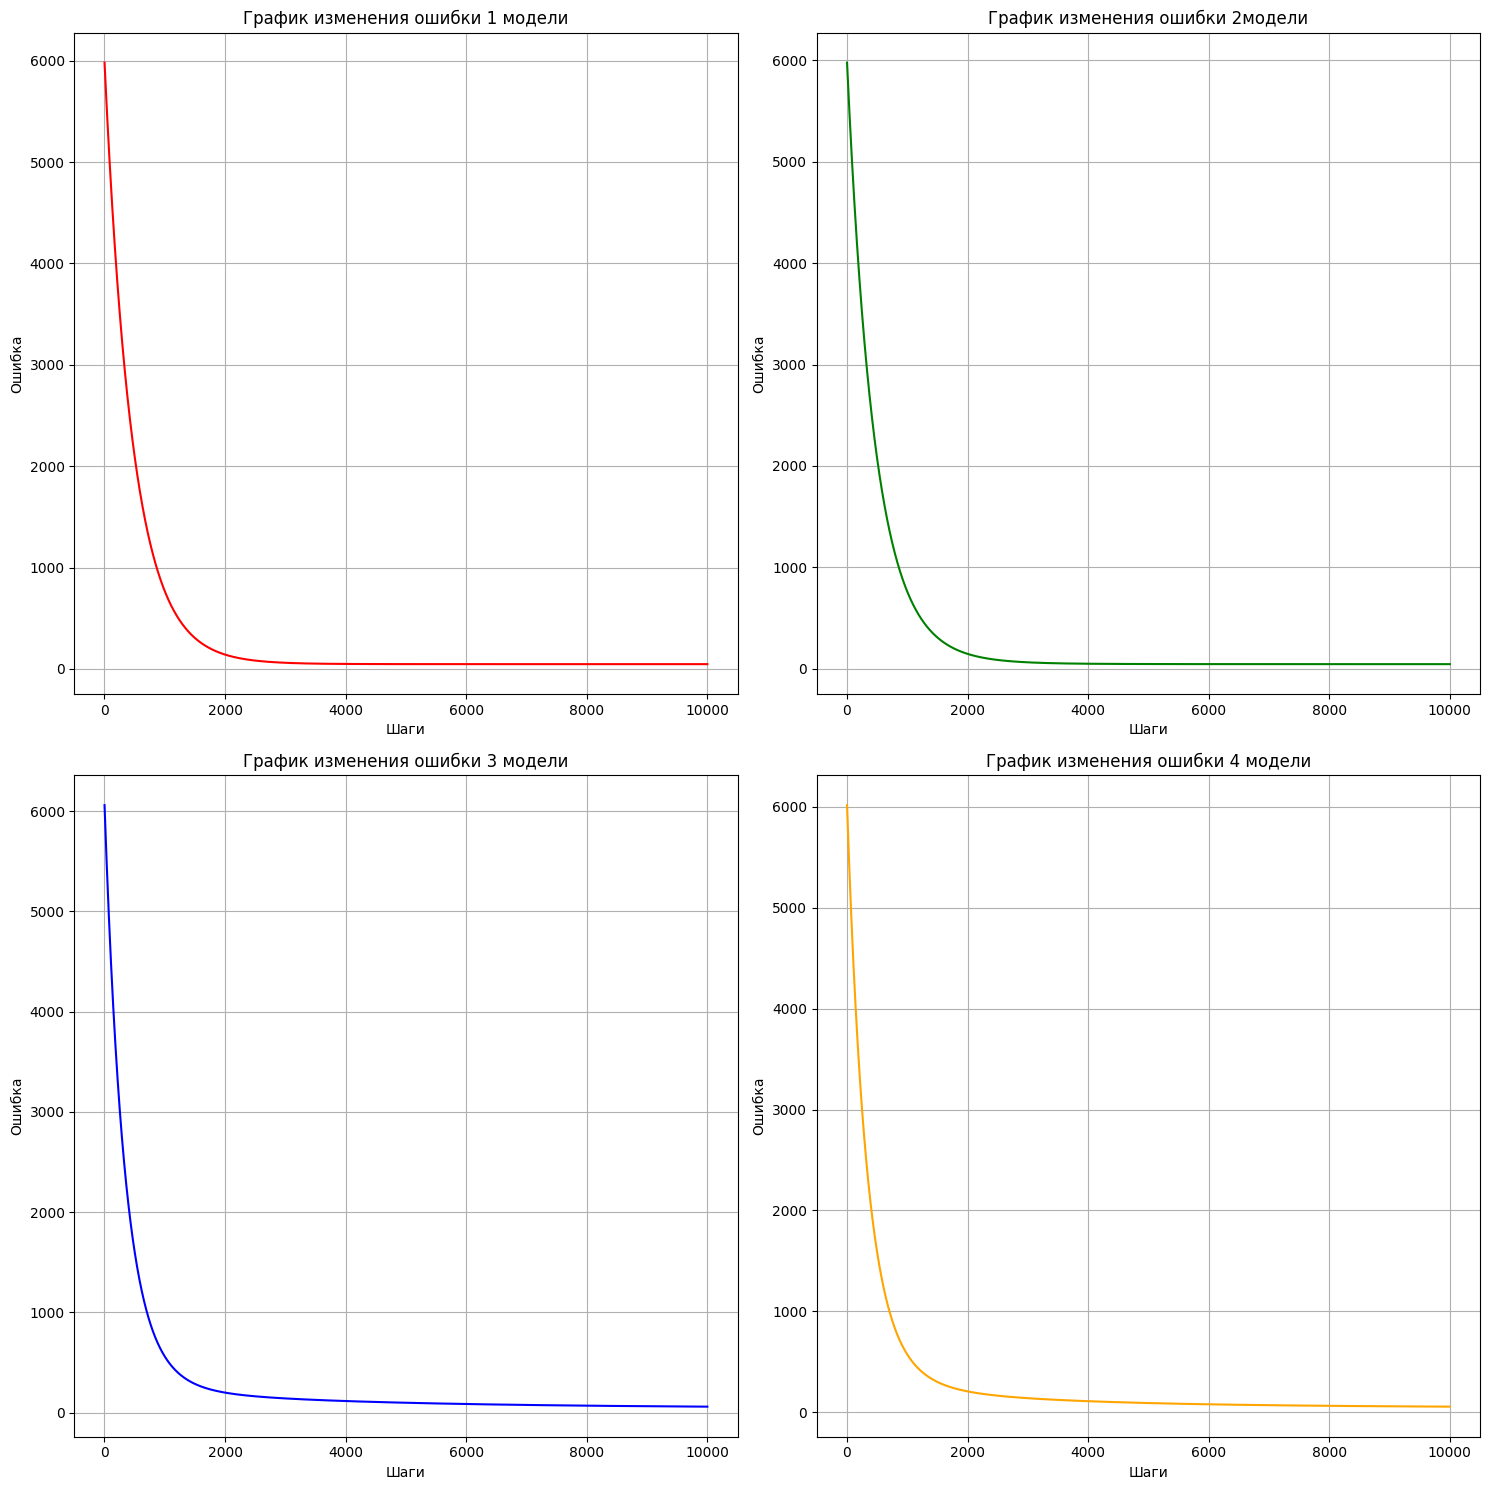

In [ ]:
# Установка размера фигуры
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Построение графиков
axs[0, 0].plot(steps, original_errors, color='red')
axs[0, 0].grid(True)
axs[0, 0].set_title('График изменения ошибки 1 модели')
axs[0, 0].set_xlabel('Шаги')
axs[0, 0].set_ylabel('Ошибка')

axs[0, 1].plot(steps, errors2, color='green')
axs[0, 1].grid(True)
axs[0, 1].set_title('График изменения ошибки 2модели')
axs[0, 1].set_xlabel('Шаги')
axs[0, 1].set_ylabel('Ошибка')

axs[1, 0].plot(steps, errors_3, color='blue')
axs[1, 0].grid(True)
axs[1, 0].set_title('График изменения ошибки 3 модели')
axs[1, 0].set_xlabel('Шаги')
axs[1, 0].set_ylabel('Ошибка')

axs[1, 1].plot(steps, errors_4, color='orange')
axs[1 ,1].grid(True)
axs[1, 1].set_title('График изменения ошибки 4 модели')
axs[1, 1].set_xlabel('Шаги')
axs[1, 1].set_ylabel('Ошибка')

# Расположение подписей осей и общего заголовка
fig.tight_layout()

# Отображение графиков
plt.show()

In [ ]:
model = Model_O(5)
original_steps, original_errors,original_t ,original_score= model.fit(x, y,max_steps=10000)
J = model.error(model.predict(x)-y, len(y))
print(original_score)
print(original_t)

{'MAE': 7.7811741845573446, 'MSE': 93.80472805379091, 'RMSE': 9.685284097732545, 'R': 0.9960892541762553, 'R²': 0.9921938022854084, 'MAPE': 0.34018723966245923}
0.47069859504699707


In [ ]:
model = Model_O(1)
x_t=np.array(x[0]).reshape(-1,1)
steps, errors_1d,t_1d ,score_1d= model.fit(x_t, y,max_steps=10000)
J = model.error(model.predict(x_t)-y, len(y))
print(score_1d)
print(t_1d)

{'MAE': 85.86002972776174, 'MSE': 11508.602192915663, 'RMSE': 107.27815338136494, 'R': 0.20562723231228483, 'R²': 0.04228255866841035, 'MAPE': 1.5387062195527672}
0.3897368907928467


In [ ]:
model = Model_O(1)
x_t=np.array(x[1]).reshape(-1,1)
steps, errors_2d,t_2d ,score_2d= model.fit(x_t, y,max_steps=10000)
J = model.error(model.predict(x_t)-y, len(y))
print(score_2d)
print(t_2d)

{'MAE': 42.13181085823648, 'MSE': 2764.149277546417, 'RMSE': 52.57517738958583, 'R': 0.8774818096304104, 'R²': 0.7699743262322599, 'MAPE': 1.6354589705100695}
0.390211820602417


In [ ]:
model = Model_O(1)
x_t=np.array(x[2]).reshape(-1,1)
steps, errors_3d,t_3d ,score_3d= model.fit(x_t, y,max_steps=10000)
J = model.error(model.predict(x_t)-y, len(y))
print(score_3d)
print(t_3d)

{'MAE': 77.53298439522925, 'MSE': 9762.986765320631, 'RMSE': 98.80782744965417, 'R': 0.43306854172732884, 'R²': 0.18754836183383516, 'MAPE': 1.9422007766032237}
0.38491058349609375


In [ ]:
model = Model_O(1)
x_t=np.array(x[3]).reshape(-1,1)
steps, errors_4d,t_4d ,score_4d= model.fit(x_t, y,max_steps=10000)
J = model.error(model.predict(x_t)-y, len(y))
print(score_4d)
print(t_4d)

{'MAE': 83.60949914101003, 'MSE': 11458.396270331818, 'RMSE': 107.04389880012694, 'R': 0.21554714451145193, 'R²': 0.04646057150704075, 'MAPE': 1.5637231507440372}
0.4232008457183838


In [ ]:
model = Model_O(1)
x_t=np.array(x[4]).reshape(-1,1)
steps, errors_5d,t_5d ,score_5d= model.fit(x_t, y,max_steps=10000)
J = model.error(model.predict(x_t)-y, len(y))
print(score_5d)
print(t_5d)

{'MAE': 87.1898367820175, 'MSE': 12020.035930529306, 'RMSE': 109.63592445238606, 'R': nan, 'R²': -0.000277693427148229, 'MAPE': 1.0116976621765905}
0.5209057331085205


<ipython-input-16-97857e644a5b>:32: RuntimeWarning: invalid value encountered in double_scalars
  return self.r_squared_value(y_true, y_pred)**(1/2)


In [ ]:
metric_df2=pd.DataFrame({"Type":[],"MAE":[],"MSE":[],"RMSE":[],"R":[],"R²":[],"MAPE":[],"Time":[]})
test_df=pd.DataFrame({"Type":["1d"],"MAE":[score_1d["MAE"]],"MSE":[score_1d["MSE"]],"RMSE":[score_1d["RMSE"]],"R":[score_1d["R"]],"R²":[score_1d["R²"]],"Time":[t_1d],"MAPE":[score_1d["MAPE"]]})
test_df1=pd.DataFrame({"Type":["2d"],"MAE":[score_2d["MAE"]],"MSE":[score_2d["MSE"]],"RMSE":[score_2d["RMSE"]],"R":[score_2d["R"]],"R²":[score_2d["R²"]],"Time":[t_2d],"MAPE":[score_2d["MAPE"]]})
test_df5=pd.DataFrame({"Type":["3d"],"MAE":[score_3d["MAE"]],"MSE":[score_3d["MSE"]],"RMSE":[score_3d["RMSE"]],"R":[score_3d["R"]],"R²":[score_3d["R²"]],"Time":[t_3d],"MAPE":[score_3d["MAPE"]]})
test_df10=pd.DataFrame({"Type":["4d"],"MAE":[score_4d["MAE"]],"MSE":[score_4d["MSE"]],"RMSE":[score_4d["RMSE"]],"R":[score_4d["R"]],"R²":[score_4d["R²"]],"Time":[t_4d],"MAPE":[score_4d["MAPE"]]})
test_df11=pd.DataFrame({"Type":["5d"],"MAE":[score_5d["MAE"]],"MSE":[score_5d["MSE"]],"RMSE":[score_5d["RMSE"]],"R":[score_5d["R"]],"R²":[abs(score_5d["R²"])],"Time":[t_5d],"MAPE":[score_5d["MAPE"]]})
metric_df2=pd.concat([metric_df2, test_df,test_df1,test_df5,test_df10,test_df11], ignore_index=True).fillna(0)

In [ ]:
all_metric_df=pd.concat([metric_df,metric_df2],ignore_index=True)
all_metric_df

,Type,MAE,MSE,RMSE,R,R²,MAPE,Time
0,Original,7.781172,93.804727,9.685284,0.996089,0.992194,0.340188,0.683350
1,2p,7.740433,92.729351,9.629608,0.996134,0.992283,0.324345,0.393951
2,3p,8.782274,120.237805,10.965300,0.994984,0.989994,0.311944,0.966519
3,10p,8.631382,114.238549,10.688243,0.995235,0.990493,0.317209,0.732249
4,1d,85.860030,11508.602193,107.278153,0.205627,0.042283,1.538706,0.389737
5,2d,42.131811,2764.149278,52.575177,0.877482,0.769974,1.635459,0.390212
6,3d,77.532984,9762.986765,98.807827,0.433069,0.187548,1.942201,0.384911
7,4d,83.609499,11458.396270,107.043899,0.215547,0.046461,1.563723,0.423201
8,5d,87.189837,12020.035931,109.635924,0.000000,0.000278,1.011698,0.520906


In [ ]:
all_metric_df

,Type,MAE,MSE,RMSE,R,R²,MAPE,Time
0,Original,7.781172,93.804727,9.685284,0.996089,0.992194,0.340188,0.683350
1,2p,7.740433,92.729351,9.629608,0.996134,0.992283,0.324345,0.393951
2,3p,8.782274,120.237805,10.965300,0.994984,0.989994,0.311944,0.966519
3,10p,8.631382,114.238549,10.688243,0.995235,0.990493,0.317209,0.732249
4,1d,85.860030,11508.602193,107.278153,0.205627,0.042283,1.538706,0.389737
5,2d,42.131811,2764.149278,52.575177,0.877482,0.769974,1.635459,0.390212
6,3d,77.532984,9762.986765,98.807827,0.433069,0.187548,1.942201,0.384911
7,4d,83.609499,11458.396270,107.043899,0.215547,0.046461,1.563723,0.423201
8,5d,87.189837,12020.035931,109.635924,0.000000,0.000278,1.011698,0.520906
